In [1]:
# prompt: 读取我的原始数据My Drive
# SMU_MITB_AML
# > Group Project>Property_Valuation_and_Assessment_Data.csv

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/My Drive/SMU_MITB_AML/Group Project/Property_Valuation_and_Assessment_Data.csv'
df = pd.read_csv(file_path)
print(df.head())

Mounted at /content/drive
         BBLE  BORO  BLOCK   LOT EASEMENT         OWNER BLDGCL TAXCLASS  \
0  1000163859     1     16  3859      NaN  CHEN, QI TOM     R4        2   
1  1000730028     1     73    28      NaN      NYC DSBS     V1        4   
2  1000730029     1     73    29      NaN      NYC DSBS     Y7        4   
3  1000297504     1     29  7504      NaN           NaN     R0        2   
4  1000360012     1     36    12      NaN      NYC DSBS     Y7        4   

   LTFRONT  LTDEPTH  ... VALTYPE  Borough  Latitude  Longitude  \
0        0        0  ...   AC-TR      NaN       NaN        NaN   
1      183       52  ...   AC-TR      NaN       NaN        NaN   
2       90      500  ...   AC-TR      NaN       NaN        NaN   
3       36       73  ...   AC-TR      NaN       NaN        NaN   
4      534      604  ...   AC-TR      NaN       NaN        NaN   

   Community Board  Council District  Census Tract  BIN  NTA  \
0              NaN               NaN           NaN  NaN  NaN  

In [2]:
# prompt: 将该数据均匀地分成100份，提取其中的百分之一，命名为onepercent

# Ensure reproducibility by setting a random seed
import numpy as np
np.random.seed(42)

# Sample 1% of the data
onepercent = df.sample(frac=0.01)

# Display the first few rows of the onepercent dataframe
print(onepercent.head())

# Display the size of the onepercent dataframe
print(f"Size of onepercent dataframe: {len(onepercent)}")
print(f"Size of original dataframe: {len(df)}")
print(f"Percentage of data sampled: {len(onepercent) / len(df) * 100:.2f}%")

               BBLE  BORO  BLOCK   LOT EASEMENT            OWNER BLDGCL  \
6678350  1008701502     1    870  1502      NaN   SARRO, THERESA     R4   
3918172  3084090170     3   8409   170      NaN  BENYAMIN, LILIA     A1   
1522621  3025491006     3   2549  1006      NaN     YUEN, STEVEN     R4   
3251628  5011580054     5   1158    54      NaN    ANGELA JERVIS     A5   
273439   2049680018     2   4968    18      NaN      PETARKO LLC     S2   

        TAXCLASS  LTFRONT  LTDEPTH  ... VALTYPE    Borough   Latitude  \
6678350        2      244      425  ...   AC-TR  MANHATTAN  40.734072   
3918172        1       23      100  ...   AC-TR   BROOKLYN  40.618845   
1522621        2        0        0  ...   AC-TR   BROOKLYN  40.730753   
3251628        1       23       97  ...   AC-TR  STATEN IS  40.636759   
273439         1       16       89  ...   AC-TR      BRONX  40.889518   

         Longitude  Community Board  Council District  Census Tract  \
6678350 -73.988713            105.0    

In [4]:
# prompt: 将该百分之一，命名为onepercent.csv,保存在/content/drive/My Drive/SMU_MITB_AML/Group Project/下

onepercent_file_path = '/content/drive/My Drive/SMU_MITB_AML/Group Project/onepercent.csv'
onepercent.to_csv(onepercent_file_path, index=False)

print(f"Saved 1% of the data to {onepercent_file_path}")

Saved 1% of the data to /content/drive/My Drive/SMU_MITB_AML/Group Project/onepercent.csv


In [5]:
import pandas as pd

# Step 1: Load the data
# Replace the path with your actual file location in Colab
df = pd.read_csv("/content/onepercent.csv")

# Step 2: Drop columns with too many missing values
# These columns have high missing rates and are not suitable for modeling
columns_to_drop = ['EASEMENT', 'EXMPTCL', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2']
df = df.drop(columns=columns_to_drop)

# Step 3: Select numerical features with no missing values
# These columns are clean and ready for modeling
selected_features = [
    "BORO", "BLOCK", "LOT", "TAXCLASS", "LTFRONT", "LTDEPTH",
    "AVLAND", "AVTOT", "BLDFRONT", "BLDDEPTH", "EXLAND", "EXTOT"
]
target_column = "FULLVAL"
df_cleaned = df[selected_features + [target_column]]

# Step 4: Confirm there are no missing values in the selected columns
print("Missing value check:")
print(df_cleaned.isnull().sum())

# Step 5: Preview the cleaned data
df_cleaned.head()


Missing value check:
BORO        0
BLOCK       0
LOT         0
TAXCLASS    0
LTFRONT     0
LTDEPTH     0
AVLAND      0
AVTOT       0
BLDFRONT    0
BLDDEPTH    0
EXLAND      0
EXTOT       0
FULLVAL     0
dtype: int64


,BORO,BLOCK,LOT,TAXCLASS,LTFRONT,LTDEPTH,AVLAND,AVTOT,BLDFRONT,BLDDEPTH,EXLAND,EXTOT,FULLVAL
0,1,870,1502,2,244,425,19817,92016,0,0,0,0,204481
1,3,8409,170,1,23,100,12780,28560,14,52,0,0,476000
2,3,2549,1006,2,0,0,7051,78026,0,0,913,71888,173392
3,5,1158,54,1,23,97,4920,14760,14,41,0,0,246000
4,2,4968,18,1,16,89,15610,42624,16,50,0,10020,912000


In [6]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Fill missing values in OWNER and other categorical fields
df['OWNER'] = df['OWNER'].fillna("Unknown")
df['BLDGCL'] = df['BLDGCL'].fillna("NA")
df['POSTCODE'] = df['POSTCODE'].fillna("00000")
df['Borough'] = df['Borough'].fillna("Unknown")
df['NTA'] = df['NTA'].fillna("Unknown")

# Step 2: Encode categorical fields (Label Encoding)
label_encoders = {}  # store encoders for possible inverse transform later

for col in ['OWNER', 'BLDGCL', 'POSTCODE', 'Borough']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # optional: keep encoder for decoding later

# Step 3: Drop high-cardinality fields that are hard to encode meaningfully
df = df.drop(columns=['STADDR', 'NTA'])

# Step 4: Check result
df[['OWNER', 'BLDGCL', 'POSTCODE', 'Borough']].head()


,OWNER,BLDGCL,POSTCODE,Borough
0,72240,135,3,2
1,11480,1,132,1
2,87186,135,121,1
3,7595,5,55,4
4,63714,152,80,0


🔹 Shape of cleaned dataset:
(98459, 31)

🔹 Data types and unique values (for feature engineering decisions):
BBLE: object, 94606 unique
BORO: int64, 5 unique
BLOCK: int64, 12676 unique
LOT: int64, 3285 unique
OWNER: int64, 88360 unique
BLDGCL: int64, 206 unique
TAXCLASS: object, 11 unique
LTFRONT: int64, 583 unique
LTDEPTH: int64, 645 unique
EXT: object, 3 unique
STORIES: float64, 97 unique
FULLVAL: int64, 24983 unique
AVLAND: int64, 29691 unique
AVTOT: int64, 36513 unique
EXLAND: int64, 9888 unique
EXTOT: int64, 16000 unique
EXCD1: float64, 121 unique
POSTCODE: int64, 193 unique
BLDFRONT: int64, 344 unique
BLDDEPTH: int64, 326 unique
PERIOD: object, 1 unique
YEAR: object, 9 unique
VALTYPE: object, 1 unique
Borough: int64, 6 unique
Latitude: float64, 67014 unique
Longitude: float64, 68694 unique
Community Board: float64, 61 unique
Council District: float64, 51 unique
Census Tract: float64, 1294 unique
BIN: float64, 75808 unique
New Georeferenced Column: object, 77255 unique

🔹 Sample r

,BBLE,BORO,BLOCK,LOT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,...,YEAR,VALTYPE,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,New Georeferenced Column
0,1008701502,1,870,1502,72240,135,2,244,425,NaN,...,2012/13,AC-TR,2,40.734072,-73.988713,105.0,2.0,50.0,1083247.0,POINT (-73.988713 40.734072)
1,3084090170,3,8409,170,11480,1,1,23,100,NaN,...,2015/16,AC-TR,1,40.618845,-73.910233,318.0,46.0,69602.0,3237269.0,POINT (-73.910233 40.618845)
2,3025491006,3,2549,1006,87186,135,2,0,0,NaN,...,2017/18,AC-TR,1,40.730753,-73.959401,301.0,33.0,565.0,3064526.0,POINT (-73.959401 40.730753)
3,5011580054,5,1158,54,7595,5,1,23,97,NaN,...,2016/17,AC-TR,4,40.636759,-74.149522,501.0,49.0,223.0,5111140.0,POINT (-74.149522 40.636759)
4,2049680018,2,4968,18,63714,152,1,16,89,E,...,2018/19,AC-TR,0,40.889518,-73.831272,212.0,12.0,456.0,2115359.0,POINT (-73.831272 40.889518)



🔹 Missing value count (expect all zeros):
BBLE                            0
BORO                            0
BLOCK                           0
LOT                             0
OWNER                           0
BLDGCL                          0
TAXCLASS                        0
LTFRONT                         0
LTDEPTH                         0
EXT                         66390
STORIES                      4961
FULLVAL                         0
AVLAND                          0
AVTOT                           0
EXLAND                          0
EXTOT                           0
EXCD1                       45874
POSTCODE                        0
BLDFRONT                        0
BLDDEPTH                        0
PERIOD                          0
YEAR                            0
VALTYPE                         0
Borough                         0
Latitude                     3387
Longitude                    3387
Community Board              3387
Council District             3387
Censu

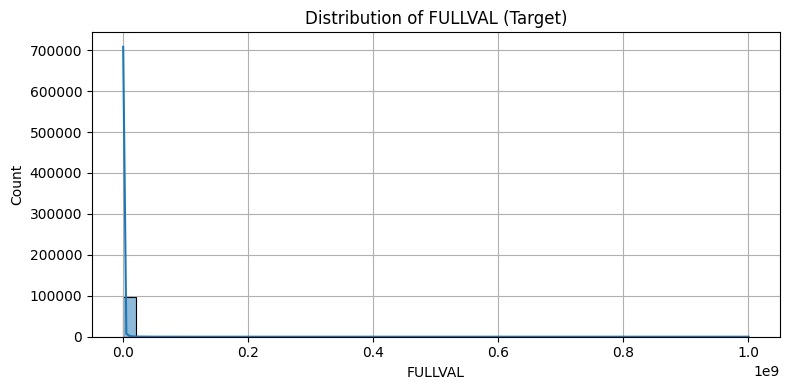

In [7]:
# Check 1: Dataset shape after cleaning
print("🔹 Shape of cleaned dataset:")
print(df.shape)

# Check 2: Column types and number of unique values per column
print("\n🔹 Data types and unique values (for feature engineering decisions):")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, {df[col].nunique()} unique")

# Check 3: Sample rows
print("\n🔹 Sample records:")
display(df.head())

# Check 4: Missing values (should all be zero now)
print("\n🔹 Missing value count (expect all zeros):")
print(df.isnull().sum())

# Optional: check value distribution for target variable (FULLVAL)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['FULLVAL'], bins=50, kde=True)
plt.title("Distribution of FULLVAL (Target)")
plt.xlabel("FULLVAL")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# ✅ STEP 1: Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ✅ STEP 2: Load data (assume 'df' already exists after cleaning and encoding)
# If not, load again here:
# df = pd.read_csv("/content/your_cleaned_file.csv")

# ✅ STEP 3: Select features and target
feature_cols = [
    "BORO", "BLOCK", "LOT", "TAXCLASS", "LTFRONT", "LTDEPTH",
    "AVLAND", "AVTOT", "BLDFRONT", "BLDDEPTH", "EXLAND", "EXTOT",
    "OWNER", "BLDGCL", "POSTCODE", "Borough"
]
target_col = "FULLVAL"

X = df[feature_cols].copy() # Use .copy() to avoid SettingWithCopyWarning
y = df[target_col].copy()   # Use .copy()

# Handle the object type of 'TAXCLASS' by converting it to numeric, coercing errors
X['TAXCLASS'] = pd.to_numeric(X['TAXCLASS'], errors='coerce')

# Drop rows where TAXCLASS became NaN due to coercion
initial_rows = X.shape[0]
X = X.dropna(subset=['TAXCLASS'])
y = y[X.index] # Ensure target matches the filtered features
rows_dropped = initial_rows - X.shape[0]
print(f"Dropped {rows_dropped} rows with non-numeric TAXCLASS values.")


# ✅ STEP 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 5: Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ STEP 6: Build the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) # Output layer for regression
])

# ✅ STEP 7: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Print model summary
model.summary()

Dropped 10139 rows with non-numeric TAXCLASS values.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model using training data with validation split
history = model.fit(
    X_train_scaled, y_train,         # input features and labels
    validation_split=0.2,            # 20% of training data used for validation
    epochs=50,                       # number of training epochs
    batch_size=32,                   # number of samples per gradient update
    verbose=1                        # show progress bar
)


Epoch 1/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 60856285003776.0000 - mae: 1057778.7500 - mse: 60856285003776.0000 - val_loss: 94393692323840.0000 - val_mae: 1161867.2500 - val_mse: 94393692323840.0000
Epoch 2/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 55235745677312.0000 - mae: 995543.1875 - mse: 55235745677312.0000 - val_loss: 94319075655680.0000 - val_mae: 1152619.5000 - val_mse: 94319075655680.0000
Epoch 3/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 71691552161792.0000 - mae: 1055034.6250 - mse: 71691552161792.0000 - val_loss: 94196484538368.0000 - val_mae: 1138034.7500 - val_mse: 94196484538368.0000
Epoch 4/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 61347735797760.0000 - mae: 995934.8125 - mse: 61347735797760.0000 - val_loss: 93988900044800.0000 - val_mae: 1116391.7500 - val_mse: 93988900044800.0000
Epoch 5/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 45839665856512.0000 - mae: 960958.5000 - mse: 45839665856512.0000 - val_loss

In [12]:
# Generate predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate performance using regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"R² (R-squared): {r2:.4f}")


552/552 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step
MSE (Mean Squared Error): 79122164350976.00
MAE (Mean Absolute Error): 1003348.06
R² (R-squared): 0.3998


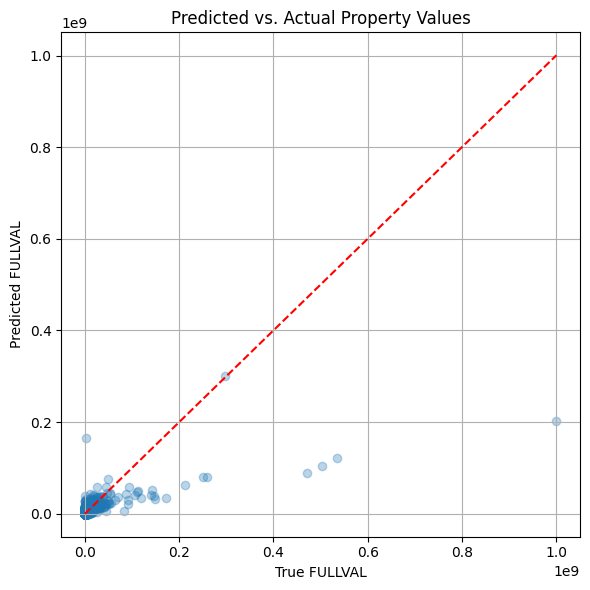

In [13]:
# Scatter plot to visualize predicted vs actual property values
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True FULLVAL")
plt.ylabel("Predicted FULLVAL")
plt.title("Predicted vs. Actual Property Values")
plt.grid(True)
plt.tight_layout()
plt.show()


Dropped 10139 rows with non-numeric TAXCLASS values.
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1767/1767 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 27.3067 - mae: 3.2165 - val_loss: 1.7165 - val_mae: 0.6943 - learning_rate: 0.0010
Epoch 2/100
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4493 - mae: 0.6379 - val_loss: 1.1573 - val_mae: 0.5469 - learning_rate: 0.0010
Epoch 3/100
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9982 - mae: 0.5198 - val_loss: 0.9544 - val_mae: 0.4929 - learning_rate: 0.0010
Epoch 4/100
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8150 - mae: 0.4761 - val_loss: 0.8361 - val_mae: 0.4805 - learning_rate: 0.0010
Epoch 5/100
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6988 - mae: 0.4441 - val_loss: 0.7478 - val_mae: 0.4507 - learning_rate: 0.0010
Epoch 6/100
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6087 - mae: 0.4163 - val_loss: 0.6236 - val_mae: 0.3935 - learning_rate: 0.0010
Epoch 7/100
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5803 - mae: 0.3933 - val_loss: 0.5546 - val_mae: 0.3768 - learning_rate: 0.0

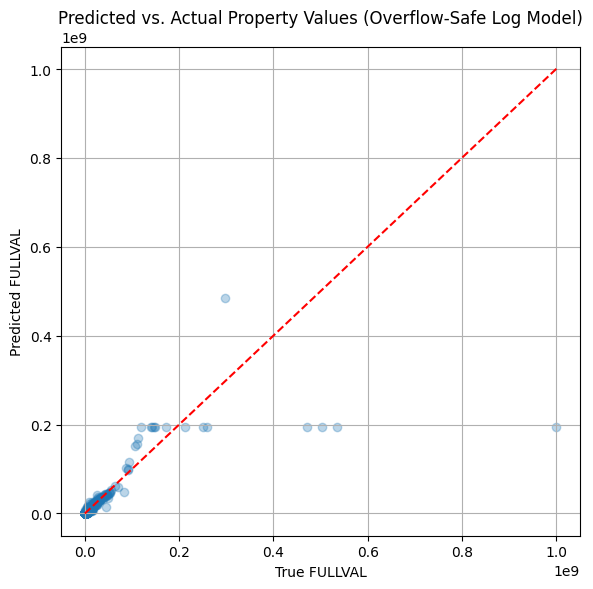

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.backend as K

# ✅ Step 1: Prepare features and target
feature_cols = [
    "BORO", "BLOCK", "LOT", "TAXCLASS", "LTFRONT", "LTDEPTH",
    "AVLAND", "AVTOT", "BLDFRONT", "BLDDEPTH", "EXLAND", "EXTOT",
    "OWNER", "BLDGCL", "POSTCODE", "Borough"
]
target_col = "FULLVAL"

X = df[feature_cols].copy() # Use .copy() to avoid SettingWithCopyWarning
y = df[target_col].copy()   # Use .copy()

# Convert 'TAXCLASS' to numeric and drop rows with non-numeric values
initial_rows = X.shape[0]
X['TAXCLASS'] = pd.to_numeric(X['TAXCLASS'], errors='coerce')
X = X.dropna(subset=['TAXCLASS'])
y = y[X.index] # Ensure target matches the filtered features
rows_dropped = initial_rows - X.shape[0]
print(f"Dropped {rows_dropped} rows with non-numeric TAXCLASS values.")


# ✅ Step 2: Split and apply log1p transformation to target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

# ✅ Step 3: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 4: Build model with output clipping to avoid expm1 overflow
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
# Clip output to prevent overflow in expm1
model.add(Lambda(lambda x: K.clip(x, 0, 20)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ✅ Step 5: Callbacks - EarlyStopping and ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# ✅ Step 6: Train model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ✅ Step 7: Predict and inverse-transform safely
y_pred_log = model.predict(X_test_scaled).flatten()
y_pred_log = np.clip(y_pred_log, a_min=None, a_max=20)  # expm1(20) ≈ 4.85e8
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# ✅ Step 8: Evaluate performance
mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"R² (R-squared): {r2:.4f}")

# ✅ Step 9: Visualize predictions
plt.figure(figsize=(6, 6))
plt.scatter(y_test_actual, y_pred, alpha=0.3)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("True FULLVAL")
plt.ylabel("Predicted FULLVAL")
plt.title("Predicted vs. Actual Property Values (Overflow-Safe Log Model)")
plt.grid(True)
plt.tight_layout()
plt.show()